## Heart Disease Prediction— Multiclass Classification

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score
import sys
import random
import tensorflow as tf

#import keras # Imported only for printing version info
#print(f'keras version: {keras.__version__}')
print(f'python version: {sys.version}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'tensorflow version: {tf.__version__}')

# To get more consistent results, try to set the random seed:
random.seed(19)
np.random.seed(19)
tf.random.set_seed(19)

keras version: 3.10.0
python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
numpy version: 2.0.2
pandas version: 2.2.2
tensorflow version: 2.19.0


In [79]:
# import the heart disease dataset
dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']

# read the csv
dataset = pd.read_csv(dataset, names=column_names)

# remove missing data with "?"
df = dataset[~dataset.isin(['?'])]

#drop rows with NaN values from DataFrame
df = df.dropna(axis=0)

# checking data type of the dataframe
print (df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [80]:
# transform data to numeric because ca and thal are object datatypes
data = df.apply(pd.to_numeric)
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


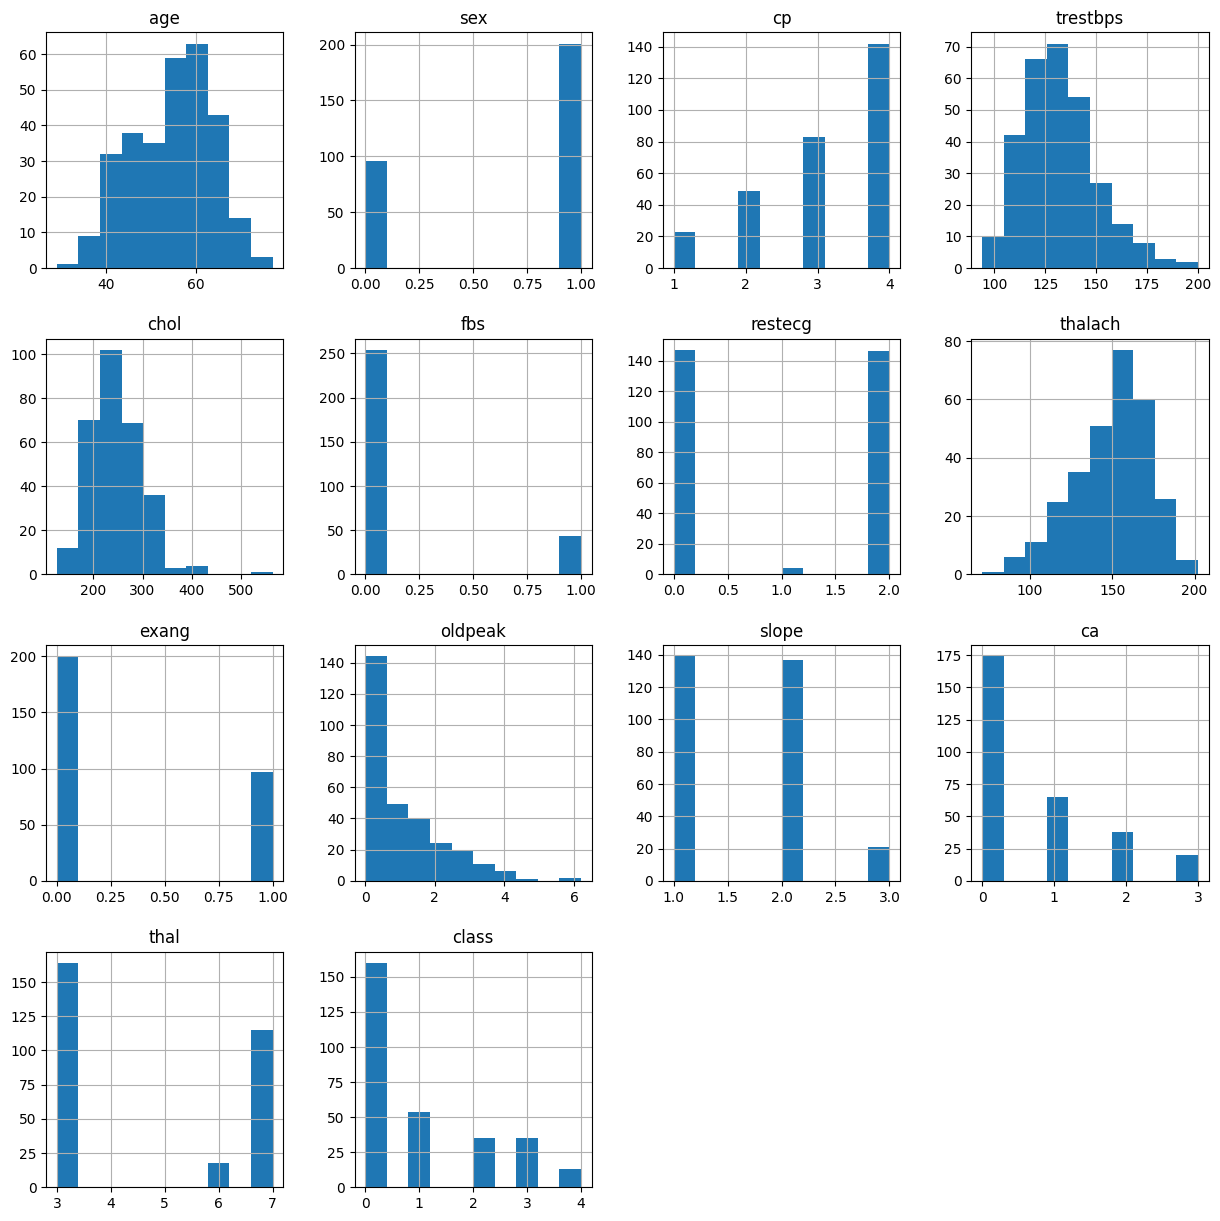

In [81]:
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()

In [82]:
# create X and Y datasets for training
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = False, random_state=90)

# Convert multi-class labels to binary: presence (1) vs absence (0)
y_train = (y_train > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [84]:
# create model
model = Sequential()
model.add(Input(shape=(13,)))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [85]:
# compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [86]:
train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

Epoch 1/60
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5564 - loss: 1.5622
Epoch 1: val_accuracy improved from -inf to 0.48333, saving model to CNN_Model-01-0.48.h5


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5562 - loss: 1.5588 - val_accuracy: 0.4833 - val_loss: 1.4544
Epoch 2/60
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5559 - loss: 1.3184
Epoch 2: val_accuracy did not improve from 0.48333
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5562 - loss: 1.3166 - val_accuracy: 0.4833 - val_loss: 1.4288
Epoch 3/60
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5591 - loss: 1.2259
Epoch 3: val_accuracy did not improve from 0.48333
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5562 - loss: 1.2425 - val_accuracy: 0.4833 - val_loss: 1.3899
Epoch 4/60
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5564 - loss: 1.2225
Epoch 4: val_accuracy did not improve from 0.48333
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5562 - loss: 1.2244 - val_accuracy: 0.4833 - val_loss: 1.3761
Epoch 5/60
20/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5577 - loss: 1.1983 
Epoch 5: val_accuracy did not improve from 0.4

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5562 - loss: 1.0386 - val_accuracy: 0.5000 - val_loss: 1.2543
Epoch 18/60
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 1.0291 
Epoch 18: val_accuracy did not improve from 0.50000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5784 - loss: 1.0300 - val_accuracy: 0.4833 - val_loss: 1.2410
Epoch 19/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.7111
Epoch 19: val_accuracy did not improve from 0.50000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 1.0220 - val_accuracy: 0.5000 - val_loss: 1.2271
Epoch 20/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.7051
Epoch 20: val_accuracy did not improve from 0.50000
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5758 - loss: 1.0143 - val_accuracy: 0.5000 - val_loss: 1.2174
Epoch 21/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 0.6962
Epoch 21: val_accuracy did not improve f

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5716 - loss: 0.9996 - val_accuracy: 0.5167 - val_loss: 1.1996
Epoch 23/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7500 - loss: 0.6818
Epoch 23: val_accuracy did not improve from 0.51667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5987 - loss: 0.9926 - val_accuracy: 0.5000 - val_loss: 1.1911
Epoch 24/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.6777
Epoch 24: val_accuracy did not improve from 0.51667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6126 - loss: 0.9862 - val_accuracy: 0.5000 - val_loss: 1.1849
Epoch 25/60
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.9819 
Epoch 25: val_accuracy did not improve from 0.51667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6101 - loss: 0.9799 - val_accuracy: 0.5000 - val_loss: 1.1805
Epoch 26/60
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.6596
Epoch 26: val_accuracy did not improve f

In [87]:
# Plotting the model
plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.close()

plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig('model_loss.png')
plt.close()

In [88]:
pred = model.predict(X_test).ravel()

print('Predicted probabilities: ', pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Maximum Probabilities of Test Dataset:  [0.93154275 0.9584911  0.9412404  0.64182097 0.7652624  0.33871827
 0.61423653 0.23947188 0.40635583 0.8967156  0.24394438 0.2831606
 0.2828778  0.90669525 0.9207028  0.96138024 0.7589875  0.7665884
 0.89488596 0.73817325 0.8582793  0.8252998  0.97382116 0.9472551
 0.2831606  0.25466612 0.283543   0.85453725 0.90855706 0.2831606
 0.28845727 0.2831606  0.7933849  0.882291   0.76683563 0.85280454
 0.92245597 0.8929442  0.8344717  0.27661058 0.9602227  0.2831606
 0.9613767  0.6698593  0.2831606  0.2831606  0.8214171  0.95382327
 0.5859586  0.95242155 0.24788699 0.2831606  0.83633506 0.9726821
 0.2831606  0.29996705 0.5697544  0.28316057 0.28316057 0.93697417]


In [89]:
for p in pred:
    print('Positive' if p >= 0.5 else 'Negative')


Critical
Critical
Critical
moderate or severe
moderate or severe
mild or moderate
moderate or severe
None
mild or moderate
Critical
None
None
None
Critical
Critical
Critical
moderate or severe
moderate or severe
Critical
moderate or severe
Critical
Critical
Critical
Critical
None
None
None
Critical
Critical
None
None
None
moderate or severe
Critical
moderate or severe
Critical
Critical
Critical
Critical
None
Critical
None
Critical
moderate or severe
None
None
Critical
Critical
moderate or severe
Critical
None
None
Critical
Critical
None
None
moderate or severe
None
None
Critical


In [90]:
# Binary classification threshold at 0.5
y_pred_bin = (pred >= 0.5).astype(int)

print('Classification Accuracy: '+str(accuracy_score(y_test, y_pred_bin) * 100)+' %')


Classification Accuracy: 50.0 %
